# Amin 
# Student code: 40206064

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7907 sha256=fe341547299a5ce9e6e17940d1ed0832d14692e859e6b05c4464f7fac326887a
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [3]:
# Import some libs are about use.

import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.ndimage import label, find_objects

# **Section1**

# In this part, the codes of part 1 are placed. All steps are mentioned.

#### Step 1: Image I/O and Display.

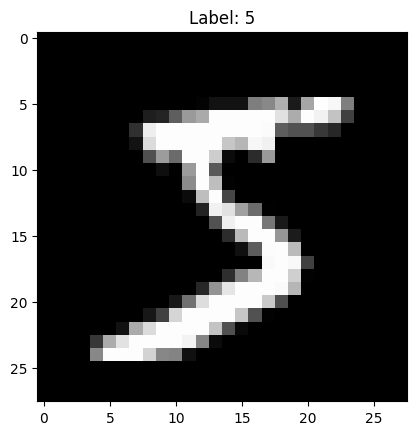

In [4]:

# Load the training images and labels
train_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-images-idx3-ubyte.idx3-ubyte')
train_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-labels-idx1-ubyte.idx1-ubyte')

# Load the test images and labels
test_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-images-idx3-ubyte.idx3-ubyte')
test_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-labels-idx1-ubyte.idx1-ubyte')

# Display a sample image
plt.imshow(train_img[0], cmap='gray')
plt.title(f"Label: {train_lb[0]}")
plt.show()


#### Step 2: Threshold the Image

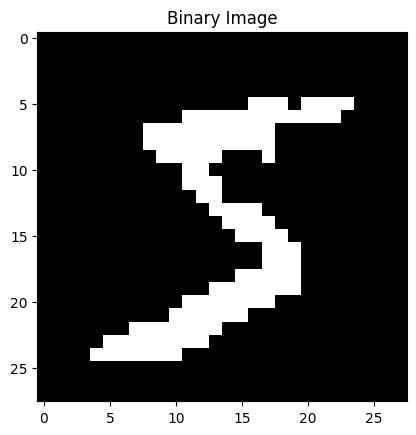

In [5]:


def threshold_image(image, threshold=100):
    binary_image = (image >= threshold).astype(np.uint8) * 255
    return binary_image

# Apply threshold to a sample image and display
binary_image = threshold_image(train_img[0])
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()


#### Step 3: Find Connected Regions

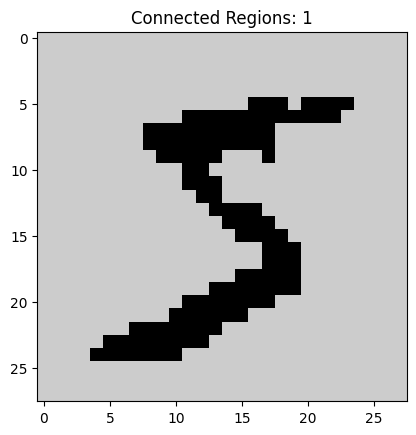

In [7]:

def find_connected_regions(binary_image):
    # Invert the image: black becomes white and vice versa
    inverted_image = 255 - binary_image
    # Find connected components
    labeled_image, num_features = label(inverted_image, structure=np.ones((3, 3)))
    return labeled_image, num_features

# Find connected regions
labeled_image, num_features = find_connected_regions(binary_image)
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title(f"Connected Regions: {num_features}")
plt.show()


#### Step 4: Measure Features

In [8]:


def measure_features(labeled_image, num_features):
    features = []
    for i in range(1, num_features + 1):
        region = (labeled_image == i)
        slice_x, slice_y = find_objects(region)[0]

        # Bounding box dimensions
        minX, maxX = slice_x.start, slice_x.stop - 1
        minY, maxY = slice_y.start, slice_y.stop - 1

        # Area of the region (number of black pixels)
        area = np.sum(region)

        # Area of the bounding box
        bounding_box_area = (maxX - minX + 1) * (maxY - minY + 1)

        # Blackness ratio
        blackness_ratio = area / bounding_box_area

        # Aspect ratio of the bounding box
        aspect_ratio = (maxX - minX + 1) / (maxY - minY + 1)

        # Number of holes
        inverted_region = np.invert(region)
        _, num_holes = label(inverted_region, structure=np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))

        # Additional features: Perimeter and compactness
        perimeter = np.sum(region[:, 1:] != region[:, :-1]) + np.sum(region[1:, :] != region[:-1, :])
        compactness = perimeter ** 2 / area

        features.append({
            "Blackness Ratio": blackness_ratio,
            "Aspect Ratio": aspect_ratio,
            "Number of Holes": num_holes - 1,  # Subtract 1 for the outer region
            "Perimeter": perimeter,
            "Compactness": compactness
        })
    return features

# Measure features for the sample image
features = measure_features(labeled_image, num_features)
for i, feature in enumerate(features):
    print(f"Region {i + 1}: {feature}")


Region 1: {'Blackness Ratio': 0.8507653061224489, 'Aspect Ratio': 1.0, 'Number of Holes': 0, 'Perimeter': 116, 'Compactness': 20.17391304347826}


# Part2: Classificstion

#### Step1 :Data Preparation: In this section, the same steps as before for data preparation are given

In [10]:

# Load the training and test images and labels
train_images = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-images-idx3-ubyte.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-labels-idx1-ubyte.idx1-ubyte')
test_images = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-images-idx3-ubyte.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-labels-idx1-ubyte.idx1-ubyte')

def threshold_image(image, threshold=100):
    binary_image = (image >= threshold).astype(np.uint8) * 255
    return binary_image

def find_connected_regions(binary_image):
    inverted_image = 255 - binary_image
    labeled_image, num_features = label(inverted_image, structure=np.ones((3, 3)))
    return labeled_image, num_features

def measure_features(labeled_image, num_features):
    features = []
    for i in range(1, num_features + 1):
        region = (labeled_image == i)
        slice_x, slice_y = find_objects(region)[0]

        # Bounding box dimensions
        minX, maxX = slice_x.start, slice_x.stop - 1
        minY, maxY = slice_y.start, slice_y.stop - 1

        # Area of the region (number of black pixels)
        area = np.sum(region)

        # Area of the bounding box
        bounding_box_area = (maxX - minX + 1) * (maxY - minY + 1)

        # Blackness ratio
        blackness_ratio = area / bounding_box_area

        # Aspect ratio of the bounding box
        aspect_ratio = (maxX - minX + 1) / (maxY - minY + 1)

        # Number of holes
        inverted_region = np.invert(region)
        _, num_holes = label(inverted_region, structure=np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))

        # Additional features: Perimeter and compactness
        perimeter = np.sum(region[:, 1:] != region[:, :-1]) + np.sum(region[1:, :] != region[:-1, :])
        compactness = perimeter ** 2 / area

        features.append([
            blackness_ratio,
            aspect_ratio,
            num_holes - 1,  # Subtract 1 for the outer region
            perimeter,
            compactness
        ])
    return features

# Extract features from images
def extract_features(images):
    all_features = []
    for img in images:
        binary_img = threshold_image(img)
        labeled_img, num_features = find_connected_regions(binary_img)
        features = measure_features(labeled_img, num_features)
        # Select the main region's features (assuming the digit is the largest region)
        if features:
            all_features.append(features[0])  # Only take the first feature set if multiple
        else:
            all_features.append([0, 0, 0, 0, 0])  # Default if no regions found
    return np.array(all_features)

# Extract features for training and test sets
train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Split the training data for training and validation
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)


#### Step 2: Choose a Classifier -----> KNN

In [11]:
# Initialize the k-NN classifier
k_values = [1, 3, 5, 7, 9]
best_k = 1
best_accuracy = 0

# Find the best k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate on the validation set
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy for k={k}: {accuracy:.2%}")

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k value: {best_k}")


Validation Accuracy for k=1: 35.98%
Validation Accuracy for k=3: 37.77%
Validation Accuracy for k=5: 39.96%
Validation Accuracy for k=7: 41.38%
Validation Accuracy for k=9: 42.43%
Best k value: 9


#### Step 3: Evaluate the Classifier

In [12]:
# Train the classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_features, train_labels)

# Predict on the test set
y_pred_test = knn.predict(test_features)

# Calculate the accuracy
test_accuracy = accuracy_score(test_labels, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2%}")

# Print a detailed classification report
print(classification_report(test_labels, y_pred_test))


Test Accuracy: 41.67%
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       980
           1       0.86      0.91      0.89      1135
           2       0.24      0.37      0.29      1032
           3       0.26      0.30      0.28      1010
           4       0.19      0.19      0.19       982
           5       0.24      0.20      0.21       892
           6       0.28      0.24      0.26       958
           7       0.35      0.37      0.36      1028
           8       0.47      0.37      0.41       974
           9       0.46      0.32      0.37      1009

    accuracy                           0.42     10000
   macro avg       0.42      0.41      0.41     10000
weighted avg       0.42      0.42      0.42     10000



#**Section2**

#In the following sections, codes from LDA, PCA methods are used as feature extraction methods

#PCA

In [13]:
# some libs we need

import idx2numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

In [14]:


# Load the training images and labels
train_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-images-idx3-ubyte.idx3-ubyte')
train_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-labels-idx1-ubyte.idx1-ubyte')

# Load the test images and labels
test_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-images-idx3-ubyte.idx3-ubyte')
test_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-labels-idx1-ubyte.idx1-ubyte')

# Flatten the images and convert them to DataFrame
num_train_samples = train_img.shape[0]
X_train_reshaped = train_img.reshape(num_train_samples, -1)

# Convert to DataFrame and add column names
columns = [f'pixel{i}' for i in range(X_train_reshaped.shape[1])]
d0 = pd.DataFrame(X_train_reshaped, columns=columns)

# Add the labels to the DataFrame
d0['label'] = train_lb

# Print the first five rows of d0
print(d0.head(5))

# Save the labels into a variable l
l = d0['label']

# Drop the label feature and store the pixel data in d
d = d0.drop("label", axis=1)

# To verify, let's print the first five rows of 'd' and 'l'
print(d.head(5))
print(l.head(5))


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  label  
0         0         0      

In [15]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


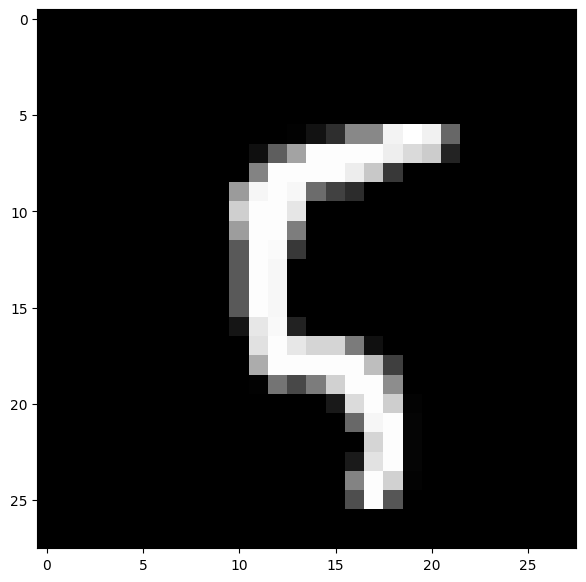

5


In [16]:

# Display or plot a number
plt.figure(figsize=(7, 7))
idx = 100

grid_data = d.iloc[idx].to_numpy().reshape(28, 28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(l.iloc[idx])


#### 2D Visualization using PCA

In [17]:
# Pick first 15K data-points to work on for time-effeciency.


labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [18]:
 #Standardizing the data


standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [19]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [20]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-Dim space.


from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [21]:

#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [22]:
# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


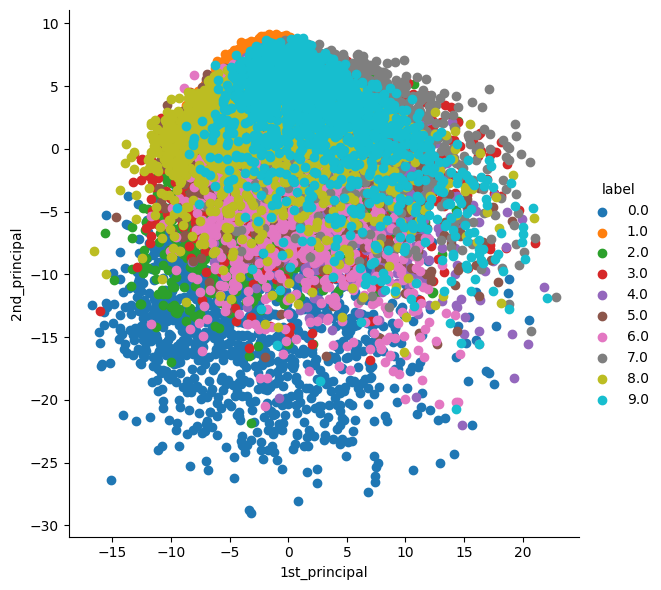

In [23]:

# Plotting the 2D data points with seaborn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


#### PCA using Scikit-Learn

In [24]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [25]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


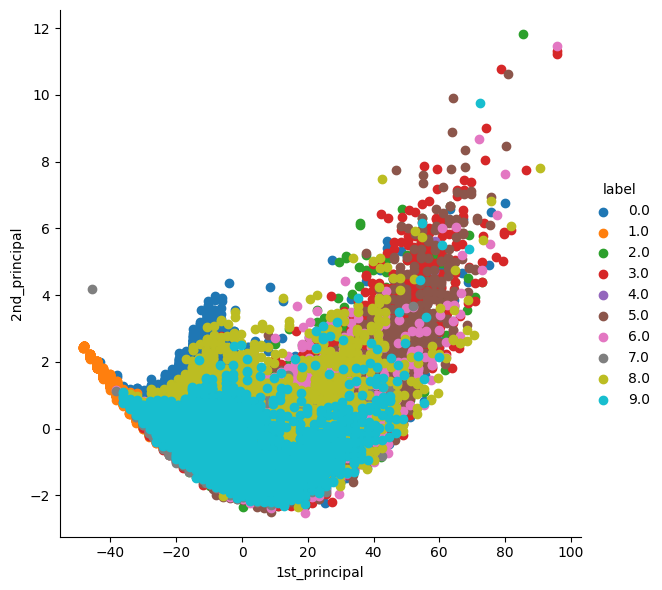

In [26]:

from sklearn.decomposition import PCA


# Reshape the X_train data to (60000, 784)
num_train_samples = X_train.shape[0]
X_train_reshaped = X_train.reshape(num_train_samples, -1)

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train_reshaped)

# Ensure that pca_data has shape (60000, 2) and y_train has shape (60000,)
assert pca_data.shape == (num_train_samples, 2)
assert y_train.shape == (num_train_samples,)

# Attaching the label for each 2D data point
pca_data_with_labels = np.hstack((pca_data, y_train.reshape(-1, 1)))

# Creating a new DataFrame which helps us in plotting the result data
pca_df = pd.DataFrame(data=pca_data_with_labels, columns=("1st_principal", "2nd_principal", "label"))

# Plotting with seaborn
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


#### PCA for dimensionality redcution

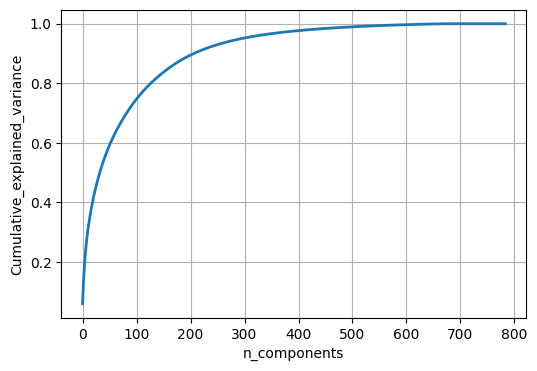

In [27]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.



In [28]:
%pip install tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46731 sha256=fe582554aea28a4c5594d6b2e9613be6a2602d36c7e9496b6ee97dfdda6ad29d
  Stored in directory: /root/.cache/pip/wheels/c0/d0/70/a33bd4bed2af4f7038b038c16faab552cd0e9d9f4125223a71
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32868 sha256=dba01e451df2a366e2dc6388d7d704f03b4fec03eef968dafefe061e0ef5c836
  Stored in directory: /root/.cache/pip/wheels/5a/eb/7c/3b6f0c25815749883152b2caca34c35dbaab13ec2864270cbd
Successfully built tools pytils


Using 75 components, explained variance is 0.8827903948155655


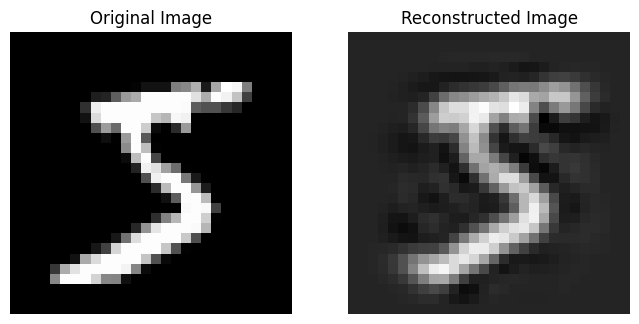

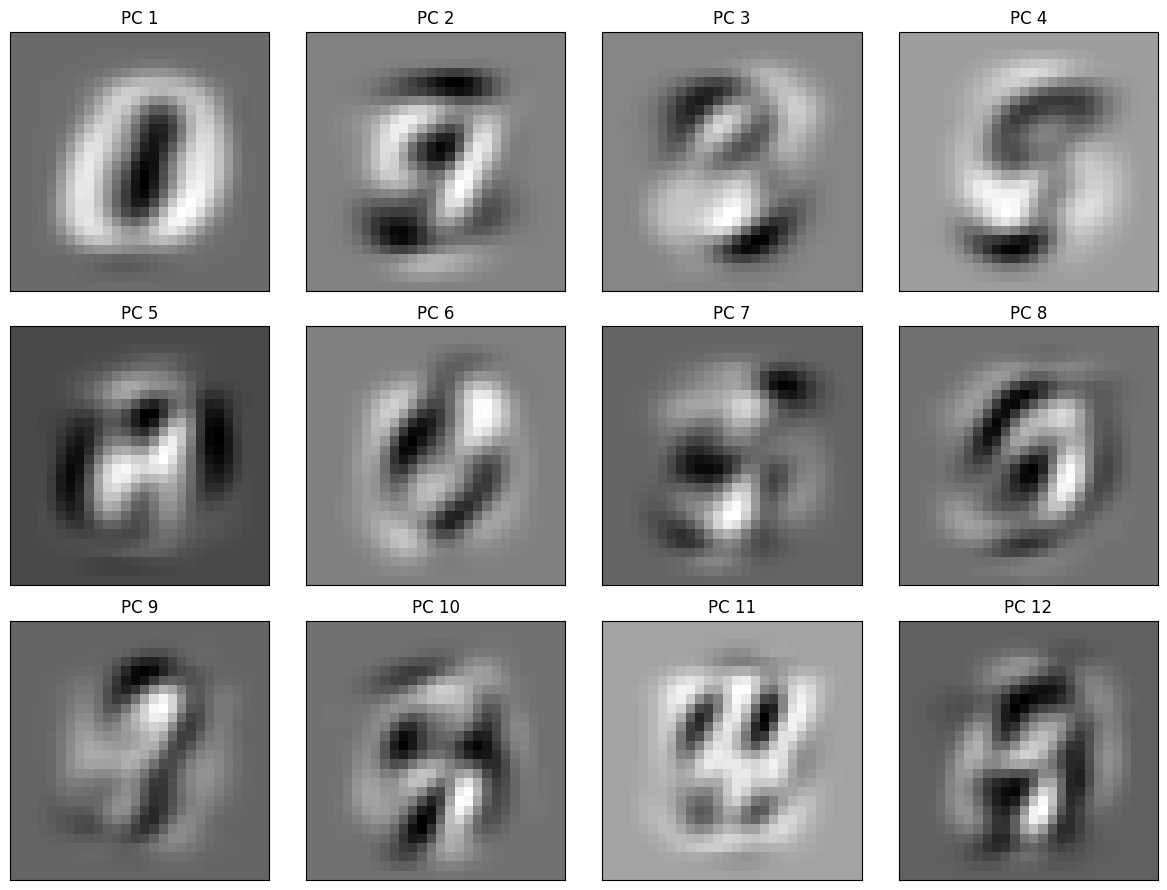

In [29]:
import idx2numpy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Parameters
n_components = 75  # Number of components to keep
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Flatten the training images
num_train_samples = train_img.shape[0]
X_train = train_img.reshape(num_train_samples, -1)
y_train = train_lb

# Filter the dataset to include only specified digits
mask = np.isin(y_train, digits)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# Reshape the images to vectors
num_samples = X_train_filtered.shape[0]
X_train_reshaped = X_train_filtered.reshape(num_samples, -1)

# Perform PCA to reduce the dimensionality
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train_reshaped)
X_rec = pca.inverse_transform(X_pca)
images_rec = X_rec.reshape(num_samples, 28, 28)

# Print explained variance
explained_variance = pca.explained_variance_ratio_.sum()
print(f'Using {n_components} components, explained variance is {explained_variance}')

# Visualize original and reconstructed images
def plot_images(original, reconstructed, idx):
    plt.figure(figsize=(8, 4))

    # Reshape the original and reconstructed images for display
    original_img = original[idx].reshape(28, 28)
    reconstructed_img = reconstructed[idx].reshape(28, 28)

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()


plot_images(X_train_filtered, images_rec, idx=0)

# Visualize principal components
def plot_principal_components(pca, num_components=None):

    num_components = min(num_components, len(pca.components_))

    fig, axes = plt.subplots(3, 4, figsize=(12, 9), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        if i < num_components:
            component = pca.components_[i].reshape(28, 28)
            ax.imshow(component, cmap='gray')
            ax.set_title(f'PC {i+1}')
    plt.tight_layout()
    plt.show()

# Plot available principal components
plot_principal_components(pca, num_components=12)


#### PCA and KNN

In [31]:


# using idx2numpy to import the MNIST dataset
train_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-images-idx3-ubyte.idx3-ubyte')
train_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-labels-idx1-ubyte.idx1-ubyte')
test_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-images-idx3-ubyte.idx3-ubyte')
test_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-labels-idx1-ubyte.idx1-ubyte')

print(train_img.shape)
print(train_lb.shape)
print(test_img.shape)
print(test_lb.shape)

# set random seed
np.random.seed(42)
trainsize = 2000  # number of training images we use, selected randomly
randtrain = np.random.choice(train_img.shape[0], trainsize, replace=False)
train_image, train_label = train_img[randtrain], train_lb[randtrain]

np.random.seed(10)
testsize = 10000  # number of testing images we use, selected randomly
randtest = np.random.choice(test_img.shape[0], testsize, replace=False)
test_image, test_label = test_img[randtest], test_lb[randtest]

print(train_image.shape, train_label.shape, test_image.shape, test_label.shape)


trainsize = 2000
matrix = []
for i in range(0, trainsize):
    matrix.append(train_image[i].flatten())

matrix = np.array(matrix).T

print(matrix.shape)  # should be (784, trainsize)


# print(matrix)

# take an (x by k) matrix A (where x is the total number of pixels in an image
# and k is the number of training images) and return a vector m of length x
# containing the mean column vector of A and an (x by k) matrix V that
# contains k eigenvectors of the covariance matrix of A
# (after the mean has been subtracted). These should be sorted in descending
# order by eigenvalue (i.e., V(:,1) is the eigenvector with the largest associated
# eigenvalue) and normalized (i.e., norm(V(:,1)) = 1). You can reshape a vector
# and display it as an image.
def hw1FindEigendigits(Mat):
    mean = np.array(np.mean(Mat, axis=1), ndmin=2).T

    mean_Matrix = np.broadcast_to(mean, (784, trainsize))
    A = (Mat - mean_Matrix) / np.sqrt(trainsize)  # A should be a (784,trainsize) matrix

    if trainsize < 784:
        # compute A^tA
        small_Mat = np.matmul(A.T, A)
        # find the eigenvalues and eigenvectors of A^tA
        mu, v = np.linalg.eig(small_Mat)
    else:
        small_Mat = np.matmul(A, A.T)
        mu, v = np.linalg.eig(small_Mat)

    # print(mu)
    print(v[0].shape)  # should be (trainsize,)
    # print(v[0])

    # sort by eigenvalues in decreasing order
    ls = []
    for i in range(min(trainsize, 784)):
        ls.append((mu[i], v[i]))
    ls = sorted(ls, key=lambda ls: ls[0], reverse=True)
    # print(ls)

    # print(np.matmul(A,ls[0][1]).shape)  # should be (784,)

    V = []
    for i in range(min(trainsize, 784)):
        if trainsize < 784:
            vec = np.matmul(A, ls[i][1])
            norm = np.linalg.norm(vec)
            vec = vec / norm
            # print(np.linalg.norm(vec))  # check the norm, should be 1
            V.append(vec)
        else:
            V.append(ls[i][1])

    V = np.array(V).T
    print(V.shape)  # should be (784,trainsize)

    return mean, V


mean, V = hw1FindEigendigits(matrix)
# print(mean.shape)  # should be (784,1)
# print(mean)

# code for displaying the first eight eigendigits
"""
for i in range(8):
    plt.subplot(2, 4, i + 1)
    img = (V[:, i]).reshape(28, 28)
    plt.title('#{}'.format(i + 1))
    plt.imshow(img)
plt.show()
"""

# print(V.shape)  # should be (784,8)

# create eigenvector space
Omega = []
for i in range(trainsize):
    Omega_i = []
    X_i = matrix[:, i] - mean[:, 0]
    for j in range(min(trainsize, 784)):
        Omega_i.append(np.dot(X_i, V[:, j]))
    Omega.append(Omega_i)

Omega = np.array(Omega)
# print(Omega)  # should be (8,8)


# Define our prediction function, which uses KNN to make predictions
def predict(testsize, k):
    predict_label = []
    for i in range(testsize):
        # Form the eigenvector space of the predicting image
        Omega_test = []
        Y_i = test_image[i].flatten() - mean[:, 0]
        for j in range(min(trainsize, 784)):
            Omega_test.append(np.dot(Y_i, V[:, j]))
        # print(Omega_test)

        # reconstruct some test images with Matrix V and the Omega_test above
        if i < 3 and trainsize < 600:
            recon_img = np.matmul(V, Omega_test).reshape(28, 28)
            print(recon_img.shape)
            plt.imshow(recon_img)
            plt.show()

        # Calculate L2-norm distances
        distance = []
        for j in range(trainsize):
            L2 = np.linalg.norm(np.array(Omega_test) - Omega[j, :])
            distance.append((L2, train_label[j]))
        # print(distance)
        # Sort the distance in increasing order
        distance = sorted(distance, key=lambda distance: distance[0])
        # print(distance)

        # Using KNN to choose the k nearest ones and pick the label that appears the most
        KNN_arr = []
        for i in range(k):
            KNN_arr.append(distance[i][1])
        # print(KNN_arr)  # should only contain the k-nearest labels

        # create "bins" to count the occurrences of different labels and create "order"
        # to count the appearing order of them.
        bin = np.zeros((10,), dtype=int)
        order = bin + 10
        count = 0
        for i in range(k):
            bin[KNN_arr[i]] += 1
            if order[KNN_arr[i]] == 10:
                order[KNN_arr[i]] = count
                count += 1

        # print(bin, order*(-0.1))

        # We subtract the bin count by 0.1 times the appearing order,
        # so that the digit with highest counts and appears first will have
        # the largest value.
        # We use 0.1 here so that the digits appear n times will always
        # have higher "rank" values than those appear (n-1) or fewer times.
        rank = bin - 0.1 * order
        # print(rank)

        # using argmax to find the index of the largest value, which becomes
        # the digit we predict, and assign it to label
        label = np.argmax(rank)
        predict_label.append(label)

    return predict_label


# set our testsize and k (number of nearest neighbors) to make predictions
testsize = 10000
k = 4

# display the first few actual test labels
if trainsize < 600:
    for i in range(3):
        plt.imshow(test_image[i])
        plt.show()

# generate predicting labels
predict_label = np.array(predict(testsize, k))
print("Our Predictions: {}".format(predict_label))

# assign actual labels to test_ans
test_ans = test_label[0:testsize]
print("Actual Labels:   {}".format(test_ans))

# Using "==" and sum to compute the number of correct predictions
right_ones = sum(predict_label == test_ans)
# Calculate accuracy
accuracy = right_ones / testsize
# Print accuracy with corresponding trainsize and testsize
print('Accuracy ({} trainsize, {} testsize): {}'.format(trainsize, testsize, accuracy))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(2000, 28, 28) (2000,) (10000, 28, 28) (10000,)
(784, 2000)
(784,)
(784, 784)
Our Predictions: [6 6 6 ... 6 4 5]
Actual Labels:   [6 6 9 ... 6 4 5]
Accuracy (2000 trainsize, 10000 testsize): 0.919


(784, 500)
(500,)
(784, 500)
(500, 500)
(28, 28)


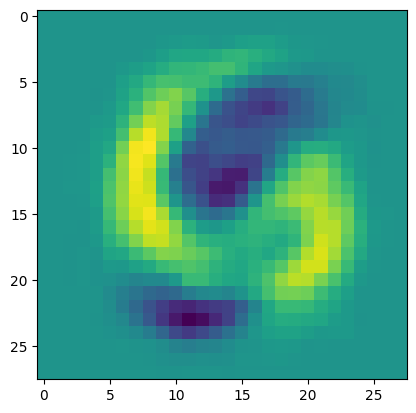

(28, 28)


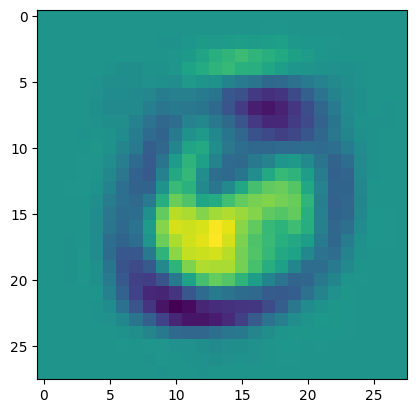

(28, 28)


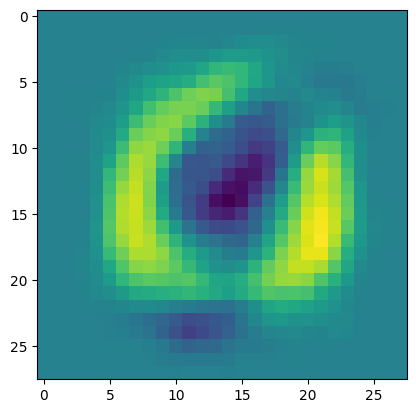

Our Predictions: [6 6 0 0 4 5 8 1 1 6 8 1 0 8 6 2 2 7 9 4 9 8 6 6 9 4 6 6 3 6 3 5 9 4 8 8 7
 4 8 3 2 1 9 6 7 1 0 9 2 3 5 8 3 0 4 7 7 2 6 3 3 7 3 0 2 4 7 9 4 9 0 8 7 0
 6 1 9 6 5 3 3 9 3 5 9 8 3 6 3 7 2 5 9 2 9 0 8 0 3 1 0 0 5 2 6 4 7 5 7 0 2
 7 2 3 6 1 4 0 2 8 0 3 4 7 0 3 7 9 1 7 5 3 4 4 8 8 8 5 2 2 8 0 1 1 3 1 5 1
 4 1 8 6 3 7 9 1 6 7 7 8 7 8 7 6 9 1 8 7 9 6 0 8 5 1 2 8 6 1 7 4 0 7 6 8 0
 7 3 7 2 9 3 6 1 5 1 7 7 0 6 9 5 8 8 4 9 8 8 3 0 6 1 2 0 5 5 7 9 7 3 9 7 7
 5 4 1 6 5 1 5 6 4 0 9 3 6 9 6 8 0 3 1 2 2 3 9 5 2 8 3 9 2 9 4 8 4 4 1 9 1
 6 4 8 0 1 1 1 7 8 1 5 7 2 4 8 4 5 8 8 3 7 0 2 4 3 8 3 8 0 5 6 7 1 8 3 3 1
 4 7 0 0 2 0 3 0 1 2 5 6 8 5 6 7 3 9 0 1 1 1 5 0 2 0 5 0 3 5 8 5 0 1 1 1 1
 6 1 1 5 9 6 1 3 1 1 9 1 4 6 1 9 1 5 9 0 9 1 2 0 8 1 3 5 5 9 9 2 3 5 8 6 8
 5 4 4 9 7 8 7 1 5 1 9 7 4 3 7 9 0 7 9 0 2 9 6 9 8 7 2 4 2 2 2 7 0 3 6 5 6
 6 1 0 1 7 4 0 1 8 5 9 5 1 2 7 9 5 4 5 7 0 1 1 5 7 1 5 8 7 1 3 7 3 3 5 4 6
 8 9 8 4 8 5 0 1 4 0 6 5 0 3 1 3 4 7 3 8 1 4 6 5 3 1 1 6 3 6 1 5 7 1 5 5 8
 5 9 5 6

In [33]:

# using idx2numpy to import the MNIST dataset
train_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-images-idx3-ubyte.idx3-ubyte')
train_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/train-labels-idx1-ubyte.idx1-ubyte')
test_img = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-images-idx3-ubyte.idx3-ubyte')
test_lb = idx2numpy.convert_from_file('/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist/t10k-labels-idx1-ubyte.idx1-ubyte')

# print(train_image.shape)
# print(train_label.shape)
# print(test_image.shape)
# print(test_label.shape)

# set training size
trainsize = 500

matrix = []
for i in range(0, trainsize):
    matrix.append(train_image[i].flatten())

matrix = np.array(matrix).T

print(matrix.shape)  # should be (784, trainsize)


# print(matrix)

# take an (x by k) matrix A (where x is the total number of pixels in an image
# and k is the number of training images) and return a vector m of length x
# containing the mean column vector of A and an (x by k) matrix V that
# contains k eigenvectors of the covariance matrix of A
# (after the mean has been subtracted). These should be sorted in descending
# order by eigenvalue (i.e., V(:,1) is the eigenvector with the largest associated
# eigenvalue) and normalized (i.e., norm(V(:,1)) = 1). You can reshape a vector
# and display it as an image.
def hw1FindEigendigits(Mat):
    mean = np.array(np.mean(Mat, axis=1), ndmin=2).T

    mean_Matrix = np.broadcast_to(mean, (784, trainsize))
    A = (Mat - mean_Matrix) / np.sqrt(trainsize)  # A should be a (784,trainsize) matrix

    if trainsize < 784:
        # compute A^tA
        small_Mat = np.matmul(A.T, A)
        # find the eigenvalues and eigenvectors of A^tA
        mu, v = np.linalg.eig(small_Mat)
    else:
        small_Mat = np.matmul(A, A.T)
        mu, v = np.linalg.eig(small_Mat)

    # print(mu)
    print(v[0].shape)  # should be (trainsize,)
    # print(v[0])

    # sort by eigenvalues in decreasing order
    ls = []
    for i in range(min(trainsize, 784)):
        ls.append((mu[i], v[i]))
    ls = sorted(ls, key=lambda ls: ls[0], reverse=True)
    # print(ls)

    # print(np.matmul(A,ls[0][1]).shape)  # should be (784,)

    V = []
    for i in range(min(trainsize, 784)):
        if trainsize < 784:
            vec = np.matmul(A, ls[i][1])
            norm = np.linalg.norm(vec)
            vec = vec / norm
            # print(np.linalg.norm(vec))  # check the norm, should be 1
            V.append(vec)
        else:
            V.append(ls[i][1])

    V = np.array(V).T
    print(V.shape)  # should be (784,trainsize)

    return mean, V


mean, V = hw1FindEigendigits(matrix)
# print(mean.shape)  # should be (784,1)
# print(mean)

# # code for displaying the first eight eigendigits
# for i in range(8):
#     plt.subplot(2, 4, i + 1)
#     img = (V[:, i]).reshape(28, 28)
#     plt.title('#{}'.format(i + 1))
#     plt.imshow(img)
# plt.show()

# print(V.shape)  # should be (784,8)

# create eigenvector space
Omega = []
for i in range(trainsize):
    Omega_i = []
    X_i = matrix[:, i] - mean[:, 0]
    for j in range(min(trainsize, 784)):
        Omega_i.append(np.dot(X_i, V[:, j]))
    Omega.append(Omega_i)

Omega = np.array(Omega)
print(Omega.shape)


# Define our prediction function, which uses KNN to make predictions
def predict(testsize, k, eigen):
    predict_label = []
    for i in range(testsize):
        # Form the eigenvector space of the predicting image
        Omega_test = []
        Y_i = test_image[i].flatten() - mean[:, 0]
        for j in range(min(trainsize, 784, eigen)):
            Omega_test.append(np.dot(Y_i, V[:, j]))

        # reconstruct some test images with Matrix V and the Omega_test above
        if i < 3 and trainsize < 600:
            recon_img = np.matmul(V, Omega_test).reshape(28, 28)
            print(recon_img.shape)
            plt.imshow(recon_img)
            plt.show()

        # Calculate L2-norm distances
        distance = []
        for j in range(min(trainsize,eigen)):
            L2 = np.linalg.norm(np.array(Omega_test) - Omega[j, 0:eigen])
            distance.append((L2, train_label[j]))
        # print(distance)
        # Sort the distance in increasing order
        distance = sorted(distance, key=lambda distance: distance[0])
        # print(distance)

        # Using KNN to choose the k nearest ones and pick the label that appears the most
        KNN_arr = []
        for i in range(k):
            KNN_arr.append(distance[i][1])
        # print(KNN_arr)  # should only contain the k-nearest labels

        # create "bins" to count the occurrences of different labels and create "order"
        # to count the appearing order of them.
        bin = np.zeros((10,), dtype=int)
        order = bin + 10
        count = 0
        for i in range(k):
            bin[KNN_arr[i]] += 1
            if order[KNN_arr[i]] == 10:
                order[KNN_arr[i]] = count
                count += 1

        # print(bin, order*(-0.1))

        # We subtract the bin count by 0.1 times the appearing order,
        # so that the digit with highest counts and appears first will have
        # the largest value.
        # We use 0.1 here so that the digits appear n times will always
        # have higher "rank" values than those appear (n-1) or fewer times.
        rank = bin - 0.1 * order
        # print(rank)

        # using argmax to find the index of the largest value, which becomes
        # the digit we predict, and assign it to label
        label = np.argmax(rank)
        predict_label.append(label)

    return predict_label


# set our testsize and k (number of nearest neighbors) to make predictions
testsize = 1000
k = 4

# # display the first few actual test labels
# if trainsize < 600:
#     for i in range(3):
#         plt.imshow(test_image[i])
#         plt.show()

# generate predicting labels

# set the number of eigenvectors we consider, the default value is trainsize,
# namely we use all of the eigenvectors
eigen = trainsize

# generate predicting labels
predict_label = np.array(predict(testsize, k, eigen))
print("Our Predictions: {}".format(predict_label))

# assign actual labels to test_ans
test_ans = test_label[0:testsize]
print("Actual Labels:   {}".format(test_ans))

# Using "==" and sum to compute the number of correct predictions
right_ones = sum(predict_label == test_ans)
# Calculate accuracy
accuracy = right_ones / testsize
# Print accuracy with corresponding trainsize, testsize, and number of eigenvectors
print('Accuracy ({} trainsize, {} testsize, {} eigenvectors): {}'.format(trainsize, testsize, eigen, accuracy))

#LDA & KNN

In [34]:
%pip install python-mnist

In [37]:
import os

path = '/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist'
print("Existing files:", os.listdir(path))


Existing files: ['train-images-idx3-ubyte.idx3-ubyte', 'train-labels-idx1-ubyte.idx1-ubyte', 't10k-images-idx3-ubyte.idx3-ubyte', 't10k-labels-idx1-ubyte.idx1-ubyte']


In [38]:
import os

# Define the directory containing the MNIST files
path = '/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist'

# Mapping of incorrect to correct filenames(changing file names)
file_renames = {
    'train-images-idx3-ubyte.idx3-ubyte': 'train-images-idx3-ubyte',
    'train-labels-idx1-ubyte.idx1-ubyte': 'train-labels-idx1-ubyte',
    't10k-images-idx3-ubyte.idx3-ubyte': 't10k-images-idx3-ubyte',
    't10k-labels-idx1-ubyte.idx1-ubyte': 't10k-labels-idx1-ubyte'
}

# Rename the files
for old_name, new_name in file_renames.items():
    old_path = os.path.join(path, old_name)
    new_path = os.path.join(path, new_name)
    os.rename(old_path, new_path)

# Verify the new file names
print("Renamed files:", os.listdir(path))


Renamed files: ['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte']


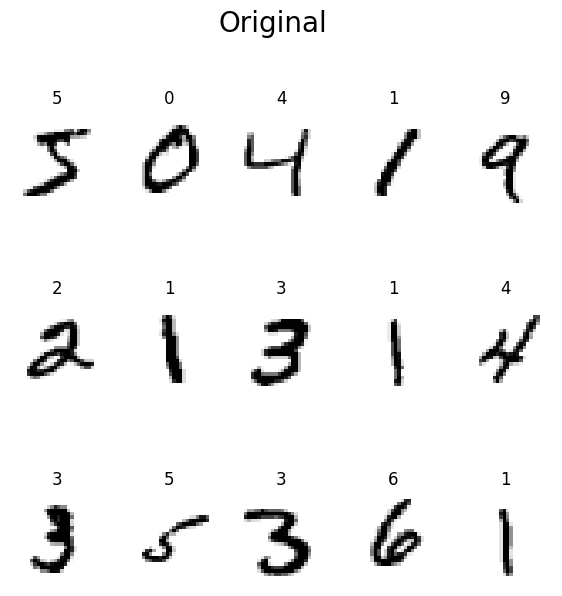

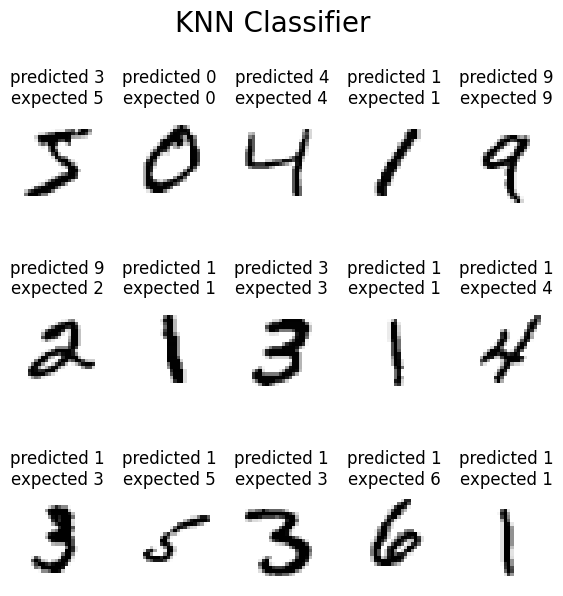

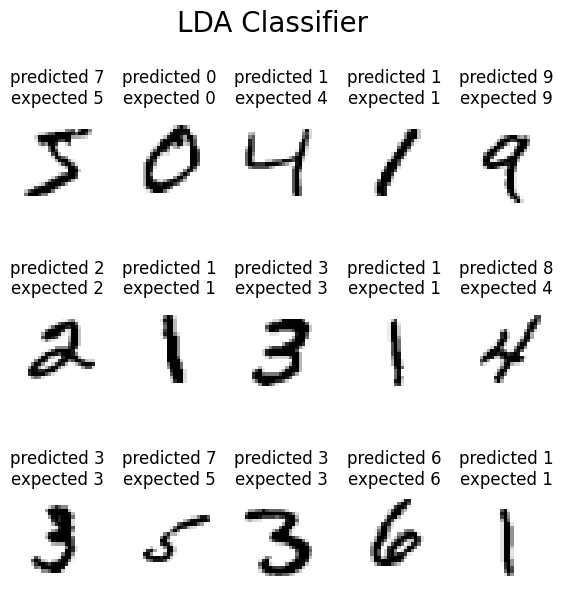

In [39]:
import random
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def imagesTo2D(images, size):
    imgs = [[[]]]*size
    for i in range(len(images)):
        imgs[i] = np.reshape(images[i], (-1, 28))
    return imgs

# Define the path to your MNIST data files
path = os.path.join('datasets', 'mnist')
mndata = MNIST(r'/content/drive/MyDrive/Colab Notebooks/PATTERN/mnist')

# Load MNIST training and testing data
images, labels = mndata.load_training()
images2, labels2 = mndata.load_testing()

# Convert the images to 2D arrays
imgs = imagesTo2D(images, len(images))

# Plot the first 15 digits
images_and_labels = list(zip(imgs, labels))
plt.figure(figsize=(7, 7))
plt.suptitle("Original", fontsize=20)
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)
plt.show()

n_samples = len(imgs)
n = np.array(imgs)
x = n.reshape((n_samples, -1))
y = labels

# Create random indices
sample_index = random.sample(range(len(x)), 350)
valid_index = [i for i in range(len(x)) if i not in sample_index]

# Sample and validation images
sample_images = [x[i] for i in sample_index]
valid_images = [x[i] for i in valid_index]

# Sample and validation targets
sample_target = [y[i] for i in sample_index]
valid_target = [y[i] for i in valid_index]

# KNN Classifier
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(sample_images, sample_target)

plt.figure(figsize=(7, 7))
plt.suptitle("KNN Classifier", fontsize=20)
for i, (image, label) in enumerate(images_and_labels[:15]):
    k += ((i+1)*2) # K changes every loop
    knn.n_neighbors = k
    # Reshape x[i] to ensure it is a 2D array
    prediction = knn.predict(x[i].reshape(1, -1))
    plt.subplot(3, 5, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('predicted %i' % prediction[0] + '\nexpected %i' % label)
plt.show()

# LDA Classifier
lda = LinearDiscriminantAnalysis()
lda.fit(sample_images, sample_target)

plt.figure(figsize=(7, 7))
plt.suptitle("LDA Classifier", fontsize=20)
for i, (image, label) in enumerate(images_and_labels[:15]):
    prediction = lda.predict(x[i].reshape(1, -1))
    plt.subplot(3, 5, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('predicted %i' % prediction[0] + '\nexpected %i' % label)
plt.show()


